# Principal Component Analysis

In [1]:
import io
import requests
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch
import seaborn as sns

# Make this notebook's output stable across runs
random_state = 1000
np.random.seed(random_state)

# Options for plots
%matplotlib widget
sns.set()
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelpad'] = 12

In [2]:
# Load NLSY data
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/Data/nlsy.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head()

,ID,Earnings,WeeksWorked,CumWeeksWorked,Education,IQ,Gender,MSA,Library,Esteem
0,83,0,3,553.0,10,2,Male,Yes,Yes,18
1,84,0,3,107.0,12,9,Male,Yes,Yes,20
2,87,11500,5,759.0,12,5,Male,Yes,Yes,22
3,105,20501,11,979.0,12,84,Female,Yes,Yes,19
4,178,59000,46,1010.0,16,99,Male,No,Yes,24


## PCA of Earnings, WeeksWorked, and CumWeeksWorked

In [3]:
X = df[['Earnings', 'WeeksWorked', 'CumWeeksWorked']]
X[:5]

,Earnings,WeeksWorked,CumWeeksWorked
0,0,3,553.0
1,0,3,107.0
2,11500,5,759.0
3,20501,11,979.0
4,59000,46,1010.0


In [4]:
# Scale and center the data prior to applying PCA
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
m, n = X_scale.shape
X_scale[:5]

array([[-1.35969277, -1.72711477, -0.83501818],
       [-1.35969277, -1.72711477, -2.65008139],
       [-0.71183039, -1.62599593,  0.0033294 ],
       [-0.20475133, -1.32263943,  0.89865206],
       [ 1.96412288,  0.44694016,  1.02481116]])

In [5]:
# Calculate PCA via SVD
U, s, Vt = np.linalg.svd(X_scale, full_matrices=False)

In [6]:
# Reassemble X_scale
np.matmul(np.matmul(U, s * np.identity(n)), Vt)

array([[-1.35969277, -1.72711477, -0.83501818],
       [-1.35969277, -1.72711477, -2.65008139],
       [-0.71183039, -1.62599593,  0.0033294 ],
       ...,
       [ 0.88810799,  0.75029666,  0.66261245],
       [ 0.2458792 ,  0.75029666,  1.30561691],
       [-0.54282282,  0.75029666,  0.43471214]])

In [7]:
# The columns of U are unit size
np.linalg.norm(U[:, 2])

0.9999999999999996

In [8]:
# Note that the diagonal elements of Sigma are sorted
s * np.identity(n)

array([[50.6985798 ,  0.        ,  0.        ],
       [ 0.        , 25.55801214,  0.        ],
       [ 0.        ,  0.        , 18.85317007]])

In [9]:
# Get the first principal component's weights
Vt.T[:, 0]

array([0.53206747, 0.59203609, 0.60530776])

In [10]:
# Calculate the transform to the first instance
# Note that a transform to 2d will take the first two components
[np.dot(Vt[0, :], X_scale[0, :]),
 np.dot(Vt[1, :], X_scale[0, :]),
 np.dot(Vt[2, :], X_scale[0, :])]

[-2.251405538327124, -0.11332419359666286, -0.6687869045930183]

In [11]:
# Calculate the transform for the first instance using
# the U and Sigma matrices
USigma = np.matmul(U, s * np.identity(n))
USigma[0, :]

array([-2.25140554, -0.11332419, -0.6687869 ])

In [12]:
# Use scikit-learn's PCA functionality
pca = PCA(n_components=2)
X2D = pca.fit_transform(X_scale)
X2D[:5]

array([[ 2.25140554, -0.11332419],
       [ 3.35007738,  0.42324761],
       [ 1.33937475,  0.13774259],
       [ 0.34803073,  0.16189058],
       [-1.92997674,  1.14590815]])

In [13]:
X_scale.shape

(1193, 3)

In [14]:
X2D.shape

(1193, 2)

In [15]:
np.linalg.norm(X2D[:,0])

50.69857979794593

In [16]:
np.linalg.norm(X2D[:,1])

25.55801214226337

In [17]:
# Get the weights that represent the principal axes in the feature space
pca.components_

array([[-0.53206747, -0.59203609, -0.60530776],
       [ 0.84084216, -0.45342293, -0.29562155]])

In [18]:
# Manually calculate the transformation for the first instance
# using sklearn's PCA results
[np.dot(pca.components_[0], X_scale[0, :]),
 np.dot(pca.components_[1], X_scale[0, :])]

[2.2514055383271248, -0.11332419359666263]

In [19]:
# The principal components are orthogonal
print(f'{np.dot(X2D[:, 0], X2D[:, 1]):.10f}')

0.0000000000


In [20]:
# Calculate the variance of the first and second principal components manually
[np.var(X2D[:, 0]), np.var(X2D[:, 1])]

[2.1545230457072004, 0.5475372880671261]

In [21]:
# Get the explained amount of variation
print([f'{x:.5f}' for x in pca.explained_variance_])

['2.15633', '0.54800']


In [22]:
# Get the explained amount of variation in ratio form
print([f'{x:.5f}' for x in pca.explained_variance_ratio_])

['0.71817', '0.18251']


In [23]:
# Calculate unexplained amount of variation in ratio form
print(f'{1 - pca.explained_variance_ratio_.sum():.3f}')

0.099


In [24]:
# Recover the 3D representation of the transformed points
X3D_inv = pca.inverse_transform(X2D)
X3D_inv[:5]

array([[-1.2931874 , -1.28152954, -1.32929216],
       [-1.42658275, -2.17527688, -2.15294894],
       [-0.59681795, -0.85541384, -0.85145361],
       [-0.04905141, -0.27945165, -0.25852405],
       [ 1.99040572,  0.62303485,  0.82947474]])

In [25]:
# Comparing to the original points
# Note that we have lost information
(X_scale - X3D_inv)[:5]

array([[-0.06650537, -0.44558522,  0.49427398],
       [ 0.06688998,  0.44816212, -0.49713245],
       [-0.11501244, -0.77058209,  0.85478301],
       [-0.15569992, -1.04318778,  1.15717611],
       [-0.02628283, -0.17609469,  0.19533642]])

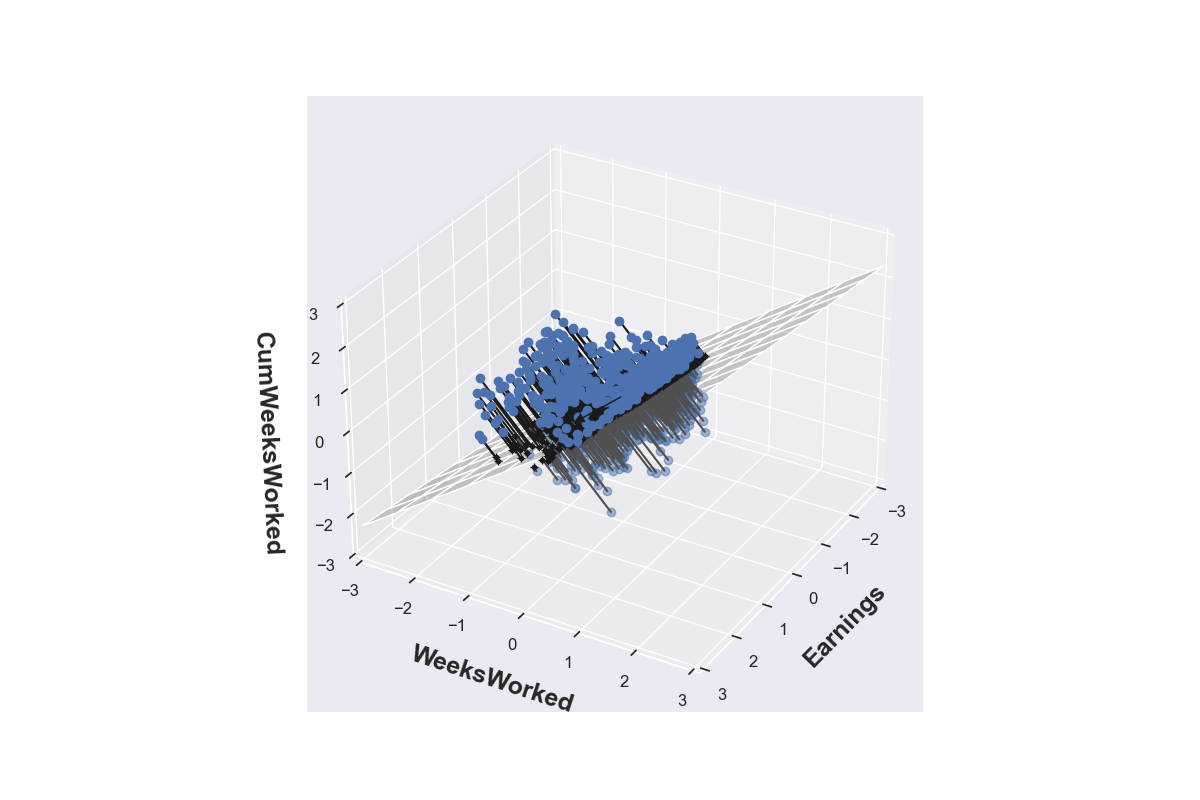

In [26]:
# Plot the projection from three to two dimensions
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

        
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]), (xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
    
    
    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)
        

axes = [-3, 3, -3, 3, -3, 3]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])
        
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X_scale[X_scale[:, 2] > X3D_inv[:, 2]]
X3D_below = X_scale[X_scale[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], 'bo', alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color='k')
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], 
                      mutation_scale=15, lw=1, arrowstyle='-|>', color='k'))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], 
                      mutation_scale=15, lw=1, arrowstyle='-|>', color='k'))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X_scale[i, 2] > X3D_inv[i, 2]:
        ax.plot([X_scale[i][0], X3D_inv[i][0]], [X_scale[i][1], X3D_inv[i][1]], 
                [X_scale[i][2], X3D_inv[i][2]], 'k-')
    else:
        ax.plot([X_scale[i][0], X3D_inv[i][0]], [X_scale[i][1], X3D_inv[i][1]], 
                [X_scale[i][2], X3D_inv[i][2]], color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], 'k+')
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], 'k.')
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], 'bo')
ax.set_xlabel('Earnings', fontsize=18)
ax.set_ylabel('WeeksWorked', fontsize=18)
ax.set_zlabel('CumWeeksWorked', fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

ax.view_init(30, 30)
plt.draw()

# plt.savefig('PCA.png', dpi=300)
plt.show()

## Exercise
What happens when you apply PCA to the untransformed (i.e., not scaled) data?

## PCA of Earnings, WeeksWorked, CumWeeksWorked, IQ, and Esteem

In [27]:
X = df[['Earnings', 'WeeksWorked', 'CumWeeksWorked', 'IQ', 'Esteem']]
X[:5]

,Earnings,WeeksWorked,CumWeeksWorked,IQ,Esteem
0,0,3,553.0,2,18
1,0,3,107.0,9,20
2,11500,5,759.0,5,22
3,20501,11,979.0,84,19
4,59000,46,1010.0,99,24


In [28]:
# Scale and center the data prior to applying PCA
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale[:5]

array([[-1.35969277, -1.72711477, -0.83501818, -1.54204602, -1.06873972],
       [-1.35969277, -1.72711477, -2.65008139, -1.31067123, -0.56488416],
       [-0.71183039, -1.62599593,  0.0033294 , -1.4428854 , -0.06102861],
       [-0.20475133, -1.32263943,  0.89865206,  1.1683443 , -0.81681194],
       [ 1.96412288,  0.44694016,  1.02481116,  1.6641474 ,  0.44282695]])

In [29]:
# Automate selecting dimensions that represent at least 80% of variance
pca = PCA(n_components=0.8)
X_reduced = pca.fit_transform(X_scale)

In [30]:
# Get the explained amount of variation
print([f'{x:.5f}' for x in pca.explained_variance_ratio_])

['0.45777', '0.21439', '0.17322']


## Exercise
For Earnings, WeeksWorked, CumWeeksWorked, IQ, and Esteem, how many components are necessary to represent at least 90% of the variation?